In [36]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.available

# Customizing Plot Legends

Plot Legends and what guids the visialization to a better direction. We've seen how these are created before. Let's now study them in detail.

The simplest way this can be created is using `plt.legend()` that automatically creates the legend matching to each plot.

(-10.0, 10.0, -1.0, 1.5)

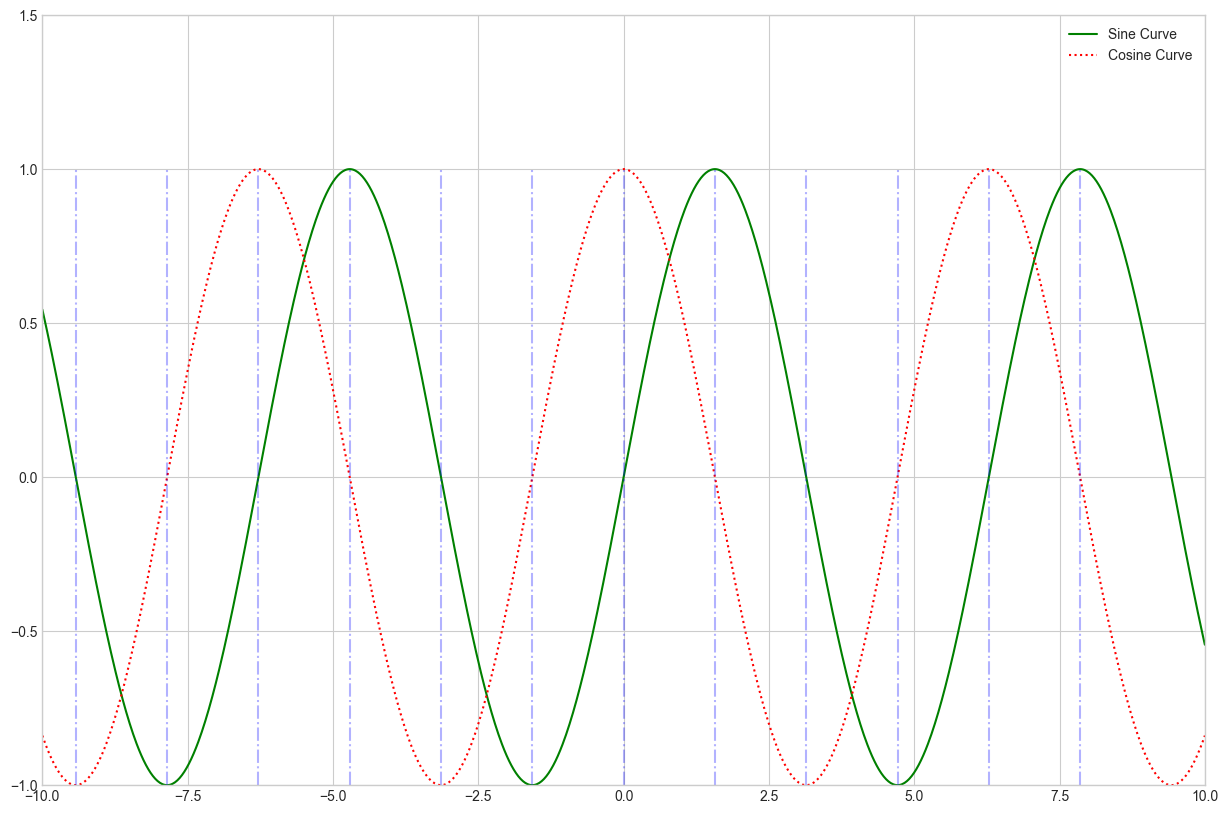

In [85]:
x=np.linspace(-10,10,1000)
(fig,ax)=plt.subplots(figsize=(15,10))
ax.plot(x,np.sin(x),'-g',label='Sine Curve')
ax.plot(x,np.cos(x),':r',label='Cosine Curve')
for i in range(-6,6):
    ax.plot(np.zeros(2)+i*np.pi/2,np.linspace(-1,1,2),'-.b',alpha=.3)
ax.legend()
ax.axis((-10,10,-1,1.5))

There are many ways you can customize the way this legend is displayed. 

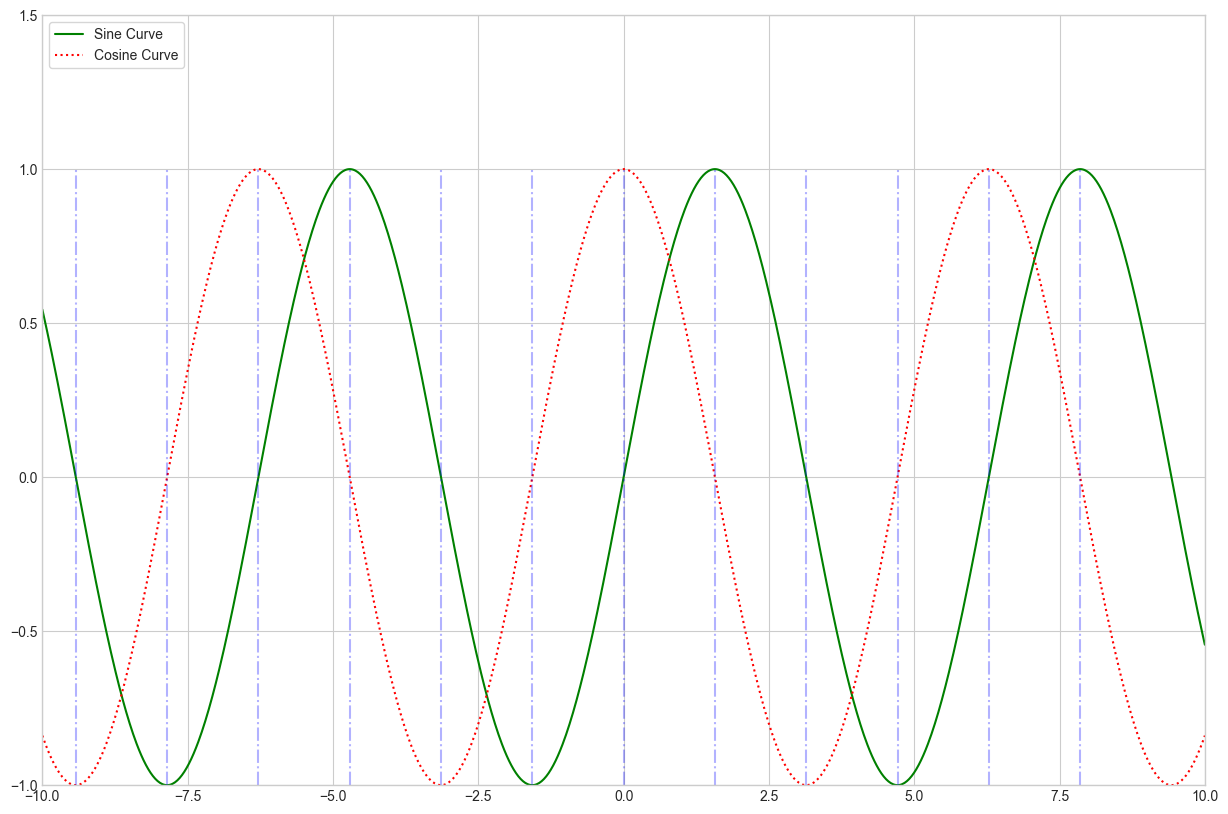

In [86]:
ax.legend(
    loc='upper left',
    frameon=True
)
fig

We can specify the number of columns in the legend using the ncol argument

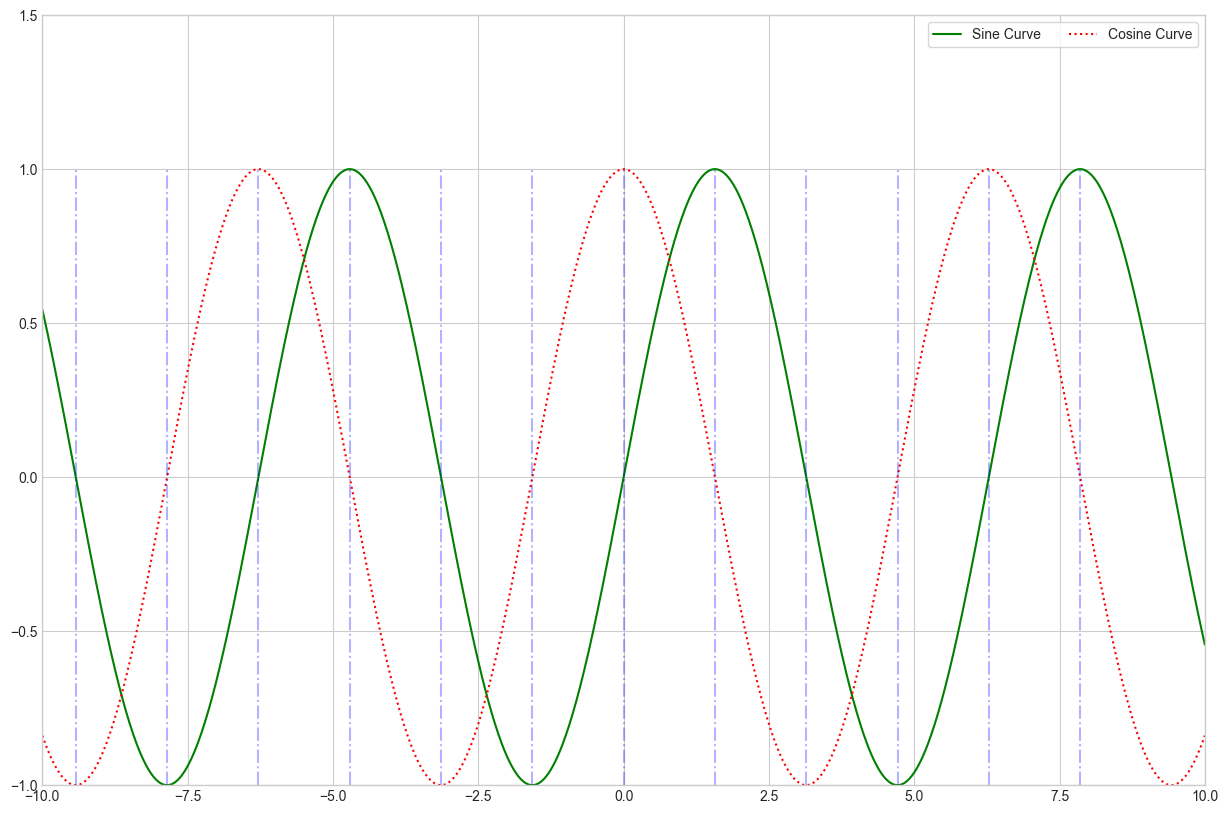

In [87]:
ax.legend(ncol=2,frameon=True)
fig

It's also possible to use a rounded box (fancybox) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:



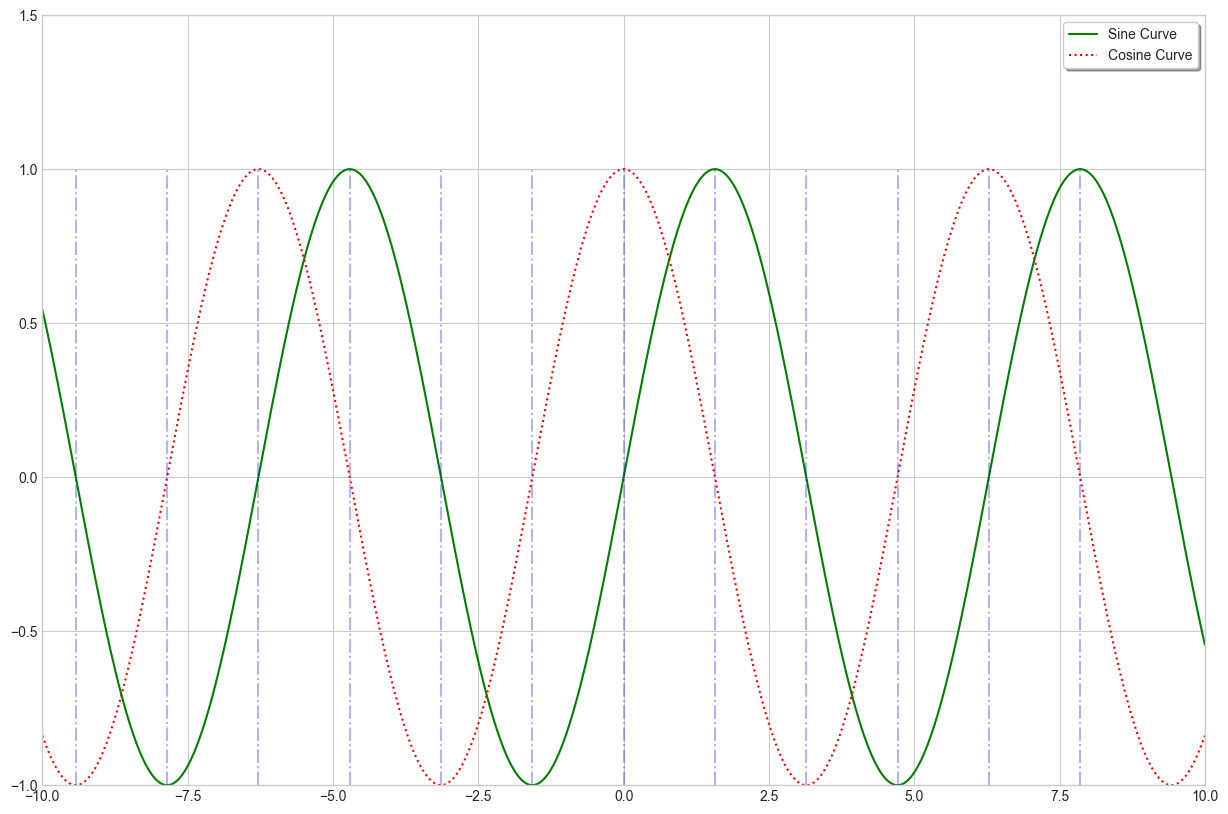

In [88]:
ax.legend(
    frameon=True,
    fancybox=True,
    shadow=True,
    )
fig

## Choosing Elements for the legened

Using the plt.legend() method, it's possible to plot all the plots and legends in one graph. It is also possible to plot these individually if need.

In [89]:
y=np.sin(x[:,np.newaxis]+np.pi*np.arange(0,2,.5))
y.shape

(1000, 4)

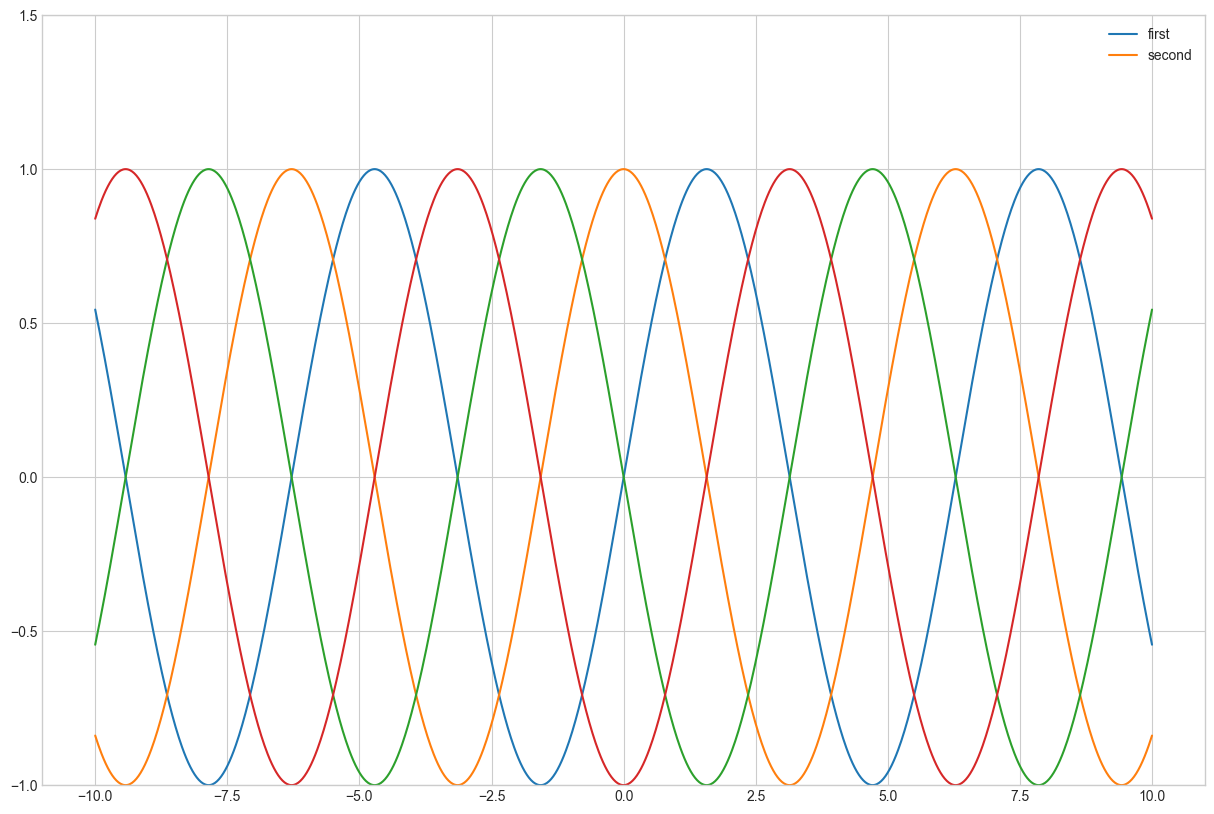

In [95]:
plt.figure(figsize=(15,10))
lines=plt.plot(x,y)
plt.ylim(-1,1.5)
# lines is the list of plt.Line2D instances. thus naming each on this function manualy attaches a label to each of them.
plt.legend(lines[:2],['first','second'],loc='upper right')

## Legend for Size of Points

Sometimes just the default functionalities of the `plt.legend()` function are not sufficient. Say we need to show the intensity of the different sizes of points on our plot. This can be done as follows.

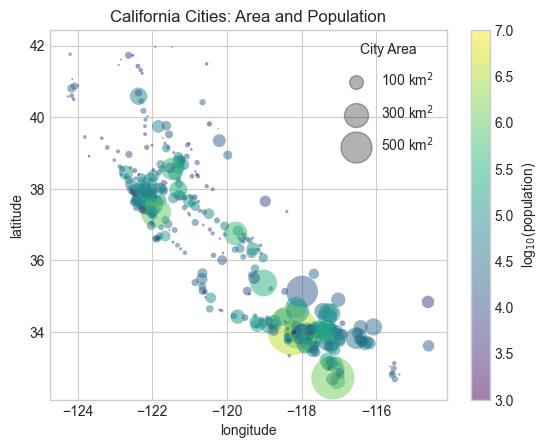

In [131]:
cities=pd.read_csv('california_cities.csv')
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
# plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');


Notice how we cleverly defined three new separate scatter plot instance, With a label, just so that the `plt.legend()` fucntion could detect it and plot it on the graph.

## Multiple Legends on one graph

Sometimes when designing a plot you'd like to add multiple legends to the same axes. Unfortunately, Matplotlib does not make this easy: via the standard legend interface, it is only possible to create a single legend for the entire plot. If you try to create a second legend using `plt.legend()` or `ax.legend()`, it will simply override the first one. We can work around this by creating a new legend artist from scratch, and then using the lower-level `ax.add_artist()` method to manually add the second artist to the plot:

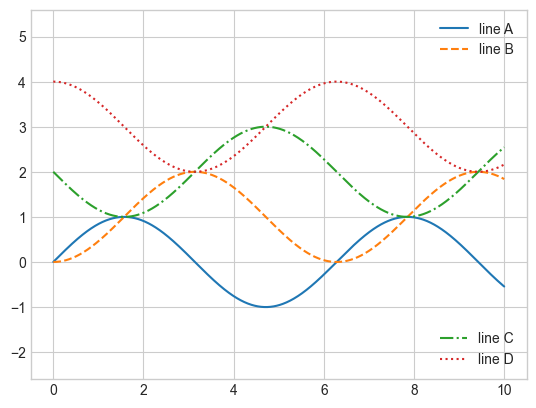

In [134]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x,i+ np.sin(x - i * np.pi / 2),
                     styles[i], )
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);
